<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/_7_%EB%82%98%EC%9D%B4%EB%B8%8C_%EB%B2%A0%EC%9D%B4%EC%A6%88_%EB%B6%84%EB%A5%98(Naive_Bayes_Classification)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 나이브 베이스 분류기(Naive Bayes Classification)

* 베이즈 정리를 적용한 확률적 분류 알고리즘
* 모든 특성들이 독립임을 가정 (naive 가정)
* 입력 특성에 따라 3개의 분류기 존재
  * 가우시안 나이브 베이즈 분류기
  * 베르누이 나이브 베이즈 분류기
  * 다항 나이브 베이즈 분류기

## 나이브 베이즈 분류기의 확률 모델

* 나이브 베이즈는 조건부 확률 모델
* *N*개의 특성을 나타내는 벡터 **x**를 입력 받아 k개의 가능한 확률적 결과를 출력

\begin{equation}
p(C_k | x_1,...,x_n)
\end{equation}

* 위의 식에 베이즈 정리를 적용하면 다음과 같음

\begin{equation}
p(C_k | \textbf{x}) = \frac{p(C_k)p(\textbf{x}|C_k)}{p(\textbf{x})}
\end{equation}

* 위의 식에서 분자만이 출력 값에 영향을 받기 때문에 분모 부분을 상수로 취급할 수 있음

\begin{equation}
\begin{split}
p(C_k | \textbf{x}) & \propto p(C_k)p(\textbf{x}|C_k) \\
& \propto p(C_k, x_1, ..., x_n)
\end{split}
\end{equation}

* 위의 식을 연쇄 법칙을 사용해 다음과 같이 쓸 수 있음

\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & = p(C_k)p(x_1, ..., x_n | C_k) \\
& = p(C_k)p(x_1 | C_k)p(x_2, ..., x_n | C_k, x_1) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)p(x_3, ..., x_n | C_k, x_1, x_2) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)...p(x_n | C_k, x_1, x_2, ..., x_{n-1})
\end{split}
\end{equation}

* 나이브 베이즈 분류기는 모든 특성이 독립이라고 가정하기 때문에 위의 식을 다음과 같이 쓸 수 있음

\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & \propto p(C_k)p(x_1|C_k)p(x_2|C_k)...p(x_n|C_k) \\
& \propto p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{split}
\end{equation}

* 위의 식을 통해 나온 값들 중 가장 큰 값을 갖는 클래스가 예측 결과

\begin{equation}
\hat{y} = \underset{k}{\arg\max} \; p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{equation}

### Naive Bayes Classification 종류

1. GaussianNB: 정규분포 나이브베이즈
2. BernoulliNB: 베르누이분포 나이브베이즈
3. MultinomialNB: 다항분포 나이브베이즈

* classes_ : 종속변수 Y의 클래스(라벨)
* class_count_ : 종속변수 Y의 값이 특정한 클래스인 표본 데이터의 수
* class_prior_ : 종속변수 Y의 무조건부 확률분포 P(Y) (정규분포의 경우에만)
* class_log_prior_ : 종속변수 Y의 무조건부 확률분포의 로그 logP(Y) (베르누이분포나 다항분포의 경우에만)

* theta_: 정규분포의 기댓값 μ
* sigma_: 정규분포의 분산 σ2

### feature_extraction(문서 전처리 기능)

1. DictVectorizer : 각 단어의 수를 세어놓은 사전에서 BOW 인코딩 벡터를 만든다.

2. CountVectorizer : 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만든다.
* 문서를 토큰 리스트로 변환한다. > 각 문서에서 토큰의 출현 빈도를 센다. > 각 문서를 BOW 인코딩 벡터로 변환한다.
* stop_words : 문자열 {‘english’}, 리스트 또는 None (디폴트) : stop words 목록.‘english’이면 영어용 스탑 워드 사용. ex) "and", "is", "the", "this
* analyzer : 문자열 {‘word’, ‘char’, ‘char_wb’} 또는 함수 : 단어 n-그램, 문자 n-그램, 단어 내의 문자 n-그램
* token_pattern : string : 토큰 정의용 정규 표현식
* tokenizer : 함수 또는 None (디폴트) : 토큰 생성 함수 .
* ngram_range : (min_n, max_n) 튜플 : n-그램 범위
* max_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1 : 단어장에 포함되기 위한 최대 빈도
* min_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1 : 단어장에 포함되기 위한 최소 빈도

3. TfidfVectorizer : CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 만든다.

4. HashingVectorizer : 해시 함수(hash function)을 사용하여 적은 메모리와 빠른 속도로 BOW 인코딩 벡터를 만든다.

#### sklearn.metrics(분류모델 성능평가)
* confusion_matrix(y_true, y_pred) : 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과
* accuracy_score(y_true, y_pred) : 전체 샘플 중 맞게 예측한 샘플 수의 비율
* precision_score(y_true, y_pred) : 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율. 
* recall_score(y_true, y_pred) : 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율
* fbeta_score(y_true, y_pred, beta) : 양성 클래스에 속하지 않는 표본 중에 양성 클래스에 속한다고 출력한 표본의 비율
* f1_score(y_true, y_pred) : 정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다
* classfication_report(y_true, y_pred) : 정밀도, 재현율, F1점수를 구한다
* roc_curve : 
* auc

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.datasets import fetch_covtype, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn import metrics

In [ ]:
prior = [0.45, 0.3, 0.15, 0.1]
likehood = [[0.3,0.3,0.4],[0.7,0.2,0.1],[0.15,0.5,0.35],[0.6,0.2,0.2]]

idx = 0

for c, xs in zip(prior, likehood) :
  result = 1
  #print(c, xs)

  for x in xs:
    result *= x
  result *= c

  idx += 1 

  print(f"{idx}번째 클래스의 가능성 : {result}")



1번째 클래스의 가능성 : 0.0162
2번째 클래스의 가능성 : 0.0042
3번째 클래스의 가능성 : 0.0039375
4번째 클래스의 가능성 : 0.0024000000000000002


## 산림 토양 데이터
* 산림 지역 토양의 특징 데이터
* 토양이 어떤 종류에 속하는지 예측
* https://archive.ics.uci.edu/ml/datasets/Covertype 에서 데이터의 자세한 설명 확인 가능

In [ ]:
covtype = fetch_covtype()
print(covtype)

In [ ]:
covtype_df = pd.DataFrame(covtype.data, columns = covtype.feature_names)
covtype_df['target'] = covtype.target

In [ ]:
covtype.target_names

['Cover_Type']

### 학습, 평가 데이터 분류

In [ ]:
covtype_X = covtype.data
covtype_y = covtype.target

In [ ]:
covtype_X_train, covtype_X_test, covtype_y_train, covtype_y_test = train_test_split(covtype_X, covtype_y, test_size=0.2)

In [ ]:
print(covtype_X.shape)
print(covtype_X_train.shape)
print(covtype_X_test.shape)

(581012, 54)
(464809, 54)
(116203, 54)


### 전처리

#### 전처리 전 데이터

In [ ]:
covtype_df = pd.DataFrame(covtype.data)
covtype_df.describe()

In [ ]:
covtype_trian_df = pd.DataFrame(data=covtype_X_train)
covtype_trian_df.describe()

In [ ]:
covtype_test_df = pd.DataFrame(data=covtype_X_test)
covtype_test_df.describe()

#### 전처리 과정

In [ ]:
scaler = StandardScaler()

covtype_X_train_scaler = scaler.fit_transform(covtype_X_train)
covtype_X_test_scaler = scaler.transform(covtype_X_test)

#### 전처리 후 데이터
* 평균은 0에 가깝게, 표준평차는 1에 가깝게 정규화

In [ ]:
covtype_trian_df = pd.DataFrame(data=covtype_X_train_scaler)
covtype_trian_df.describe()

In [ ]:
covtype_test_df = pd.DataFrame(data=covtype_X_test_scaler)
covtype_test_df.describe()

## 20 Newsgroup 데이터
* 뉴스 기사가 어느 그룹에 속하는지 분류
* 뉴스 기사는 텍스트 데이터이기 때문에 특별한 전처리 과정이 필요

In [ ]:
newgroup = fetch_20newsgroups()
print(newgroup)

In [ ]:
newgroup.data

In [ ]:
newgroup.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### 학습, 평가 데이터 분류

In [ ]:
newsgroup_train = fetch_20newsgroups(subset='train')
newsgroup_test = fetch_20newsgroups(subset='test')

In [ ]:
X_train, y_train = newsgroup_train.data, newsgroup_train.data
X_test, y_test = newsgroup_test.data, newsgroup_test.data

### 벡터화
* 텍스트 데이터는 기계학습 모델에 입력 할 수 없음
* 벡터화는 텍스트 데이터를 실수 벡터로 변환해 기계학습 모델에 입력 할 수 있도록 하는 전처리 과정
* Scikit-learn에서는 Count, Tf-idf, Hashing 세가지 방법을 지원

#### CountVectorizer
* 문서에 나온 단어의 수를 세서 벡터 생성

In [ ]:
count_vectorizer = CountVectorizer()

In [ ]:
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.fit_transform(X_test)

데이터를 희소 행렬 형태로 표현

In [ ]:
X_train_count

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [ ]:
for v in X_train_count[0]:
  print(v)

#### HashingVectorizer
* 각 단어를 해쉬 값으로 표현
* 미리 정해진 크기의 벡터로 표현

In [ ]:
hash_vectorizer = HashingVectorizer()

In [ ]:
X_train_hash = hash_vectorizer.fit_transform(X_train)
X_test_hash = hash_vectorizer.fit_transform(X_test)

In [ ]:
X_train_hash

In [ ]:
for v in X_train_hash[0]:
  print(v)

#### TfidfVectorizer
* 문서에 나온 단어 빈도(term frequency)와 역문서 빈도(inverse document frequency)를 곱해서 구함
* 각 빈도는 일반적으로 로그 스케일링 후 사용
* $tf(t, d) = log(f(t, d) + 1)$
* $idf(t, D) = \frac{|D|}{|d \in D : t \in d| + 1}$
* $tfidf(t, d, D) = tf(t, d) \times idf(t, D)$

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.fit_transform(X_test)

In [ ]:
X_train_tfidf

<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [ ]:
for v in X_train_tfidf[0]:
  print(v)

## 가우시안 나이브 베이즈

* 입력 특성이 가우시안(정규) 분포를 갖는다고 가정

In [ ]:
model = GaussianNB()
model.fit(covtype_X_train_scaler, covtype_y_train)

GaussianNB()

In [ ]:
predict = model.predict(covtype_X_train_scaler)
acc = metrics.accuracy_score(covtype_y_train, predict)
f1 = metrics.f1_score(covtype_y_train, predict, average=None)

print('Train Accuracy:{}'.format(acc))
print('Train f1:{}'.format(f1))

Train Accuracy:0.08824269753812856
Train f1:[0.04070635 0.01785519 0.33367128 0.14079819 0.04304771 0.07173133
 0.23812483]


In [ ]:
predict = model.predict(covtype_X_test_scaler)
acc = metrics.accuracy_score(covtype_y_test, predict)
f1 = metrics.f1_score(covtype_y_test, predict, average=None)

print('Test Accuracy:{}'.format(acc))
print('Test f1:{}'.format(f1))

Test Accuracy:0.08642634011170107
Test f1:[0.03935081 0.01833293 0.34025788 0.12841704 0.04254467 0.07162652
 0.22907904]


#### sklearn.datasets.make_blobs
**Scikit-Learn 패키지는 분류(classification) 모형의 테스트를 위해 여러가지 가상 데이터를 생성하는 함수를 제공한다.**

- n_samples : 표본 데이터의 수, 디폴트 100
- n_features : 독립 변수의 수, 디폴트 20
- n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
- n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
- n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
- n_classes : 종속 변수의 클래스 수, 디폴트 2
- n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
- weights : 각 클래스에 할당된 표본 수
- random_state : 난수 발생 시드

반환값:
X : [n_samples, n_features] 크기의 배열 / 독립 변수
y : [n_samples] 크기의 배열 / 종속 변수

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out 

In [ ]:
X, y = make_blobs(n_samples=1000)

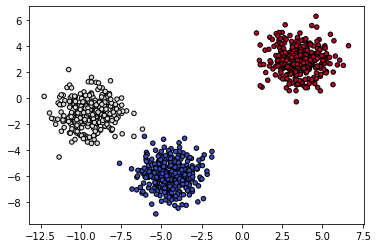

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
model = GaussianNB()
model.fit(X,y)

GaussianNB()

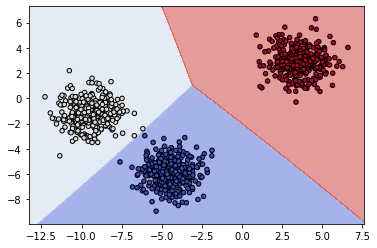

In [ ]:
xx, yy = make_meshgrid(X[:, 0], X[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha = 0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

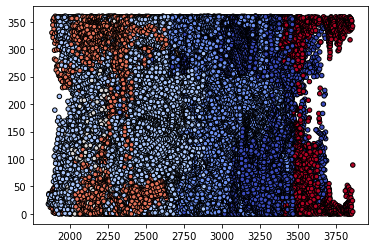

In [ ]:
plt.scatter(covtype_X[:, 0], covtype_X[:, 1], c=covtype_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

## 베르누이 나이브 베이즈

* 입력 특성이 베르누이 분포에 의해 생성된 이진 값을 갖는 다고 가정

### 학습 및 평가 (Count)

### 학습 및 평가 (Hash)

### 학습 및 평가 (Tf-idf)

### 시각화

## 다항 나이브 베이즈

* 입력 특성이 다항분포에 의해 생성된 빈도수 값을 갖는 다고 가정

### 학습 및 평가 (Count)

### 학습 및 평가 (Tf-idf)

### 시각화